# Objective:


1) To analyze the demographic factors and predict the income of individuals using data collected from the 1994 U.S. Census.

2) Classify individuals' income, whether they make more than 50k or below 50k dollars by employing several classification models. 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
import math
import warnings
warnings.filterwarnings('ignore')

In [2]:
census =pd.read_csv('adult.csv')

In [3]:
#There are 32561 rows and 15 features
census.shape

(32561, 15)

## EDA

In [4]:
census.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [5]:
census.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [6]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
census.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education.num        16
marital.status        7
occupation           15
relationship          6
race                  5
sex                   2
capital.gain        119
capital.loss         92
hours.per.week       94
native.country       42
income                2
dtype: int64

In [8]:
#The dataset doesn't have any null values, but it contains missing values in the form of '?'.
pd.DataFrame(census.isnull().sum(),columns=['No. of Missing Values'])

,No. of Missing Values
age,0
workclass,0
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,0
relationship,0
race,0
sex,0


In [9]:
#Three features contains '?'
census.isin(['?']).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [10]:
round((census.isin(['?']).sum()/census.shape[0])
      * 100, 2).astype(str) + '%'

age                0.0%
workclass         5.64%
fnlwgt             0.0%
education          0.0%
education.num      0.0%
marital.status     0.0%
occupation        5.66%
relationship       0.0%
race               0.0%
sex                0.0%
capital.gain       0.0%
capital.loss       0.0%
hours.per.week     0.0%
native.country    1.79%
income             0.0%
dtype: object

In [11]:
#Total 13.09% of missing values present in our dataset
# which are only present in 'workclass', 'occupation' and 'native.country' column and 
#These three columns are categorical columns

In [12]:
census["workclass"].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [13]:
census["occupation"].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [14]:
#US has the most count
census["native.country"].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

In [15]:
print('{}% people belong to U.S.'.format(round(len(census[census["native.country"]=='United-States'])/32561*100,2)))

89.59% people belong to U.S.


## Handling '?'

In [16]:
# We are replacing '?' with np.nan
census = census.replace(to_replace='?', value=np.nan)
census.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [17]:
print(census.isna().sum())

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64


In [18]:
#Imputing the nan values with mode
census= census.fillna(census.mode().iloc[0])
census.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


### Data Summary

In [19]:
census.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## Univariate Analysis

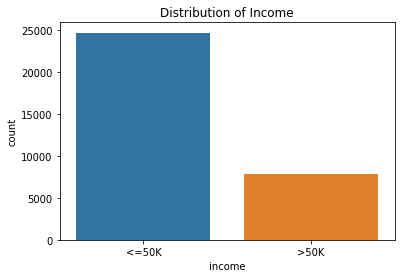

In [20]:
# Income
sns.countplot(x='income', data=census)
plt.title("Distribution of Income", fontsize = 12)
plt.show()

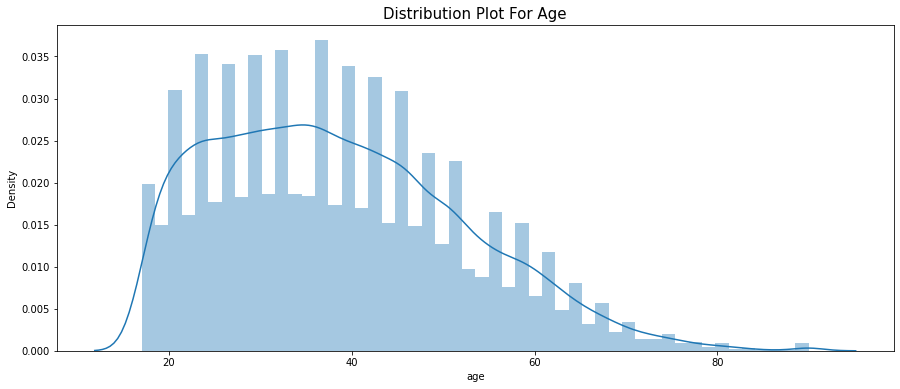

In [21]:
#Age
plt.figure(figsize=[15,6])
sns.distplot(census['age'])
plt.title('Distribution Plot For Age', fontsize = 15);

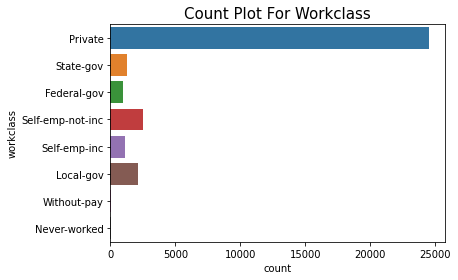

In [22]:
#Workclass
sns.countplot(y='workclass', data=census)
plt.title("Count Plot For Workclass", fontsize = 15)
plt.show()

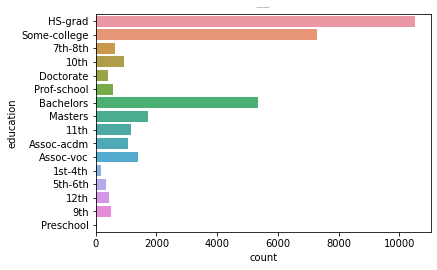

In [23]:
#Education
sns.countplot(y='education', data=census)
plt.title("Distribution of Education", fontsize = 1)
plt.show()

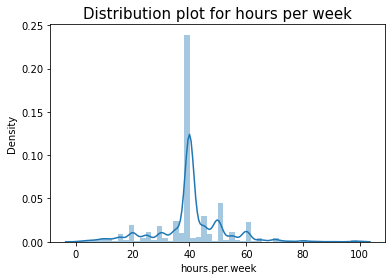

In [24]:
#hours per week
sns.distplot(census['hours.per.week'])
plt.title('Distribution plot for hours per week', fontsize = 15);

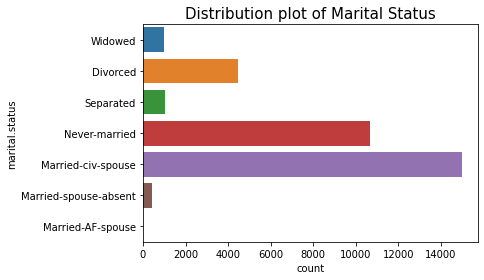

In [25]:
#Marital Status
plt.title('Distribution plot of Marital Status', fontsize = 15);
sns.countplot(y="marital.status", data=census);

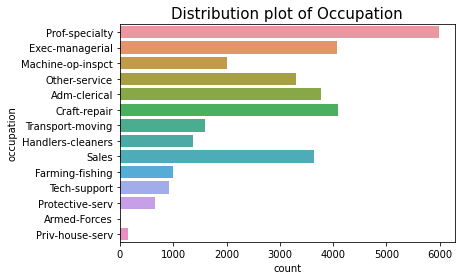

In [26]:
#Occupation
plt.title('Distribution plot of Occupation', fontsize = 15);
sns.countplot(y="occupation", data=census);

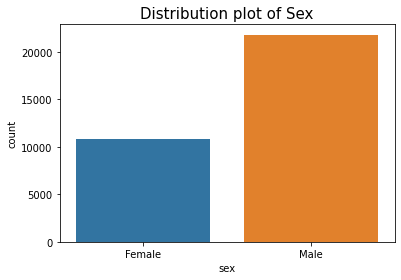

In [27]:
#Sex
plt.title('Distribution plot of Sex', fontsize = 15);
sns.countplot(x="sex", data=census);

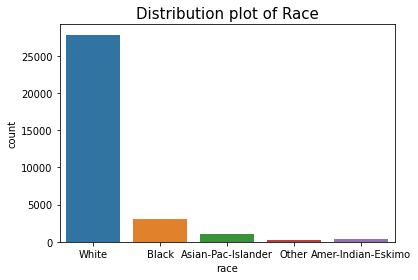

In [28]:
#Race
plt.title('Distribution plot of Race', fontsize = 15);
sns.countplot(x="race", data=census);

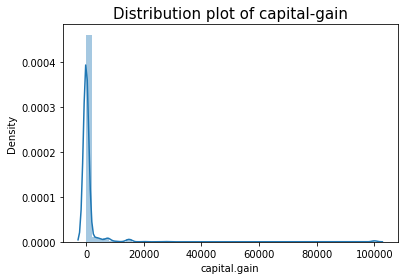

In [29]:
#capital-gain
sns.distplot(census['capital.gain'])
plt.title('Distribution plot of capital-gain', fontsize = 15);

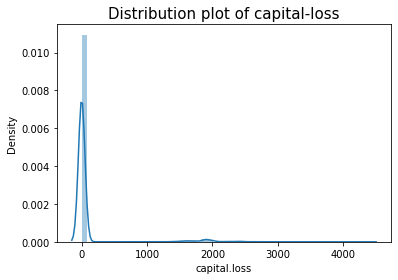

In [30]:
#capital-loss
sns.distplot(census['capital.loss'])
plt.title('Distribution plot of capital-loss', fontsize = 15);

## Bivariate Analysis

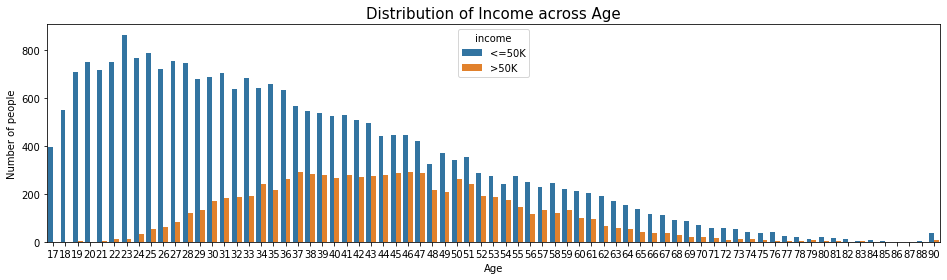

In [31]:
#Income by Age

plt.figure(figsize=[16,4])
sns.countplot(census['age'], hue=census['income'])
plt.title('Distribution of Income across Age', fontsize=15)
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.show()

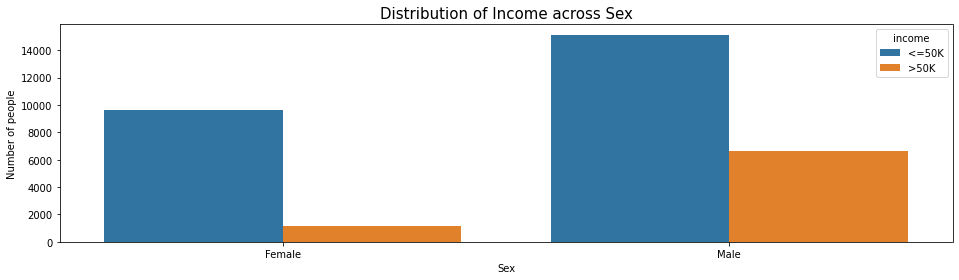

In [32]:
#Income by Sex
plt.figure(figsize=[16,4])
sns.countplot(census['sex'], hue=census['income'])
plt.title('Distribution of Income across Sex', fontsize=15)
plt.xlabel('Sex')
plt.ylabel('Number of people')
plt.show()

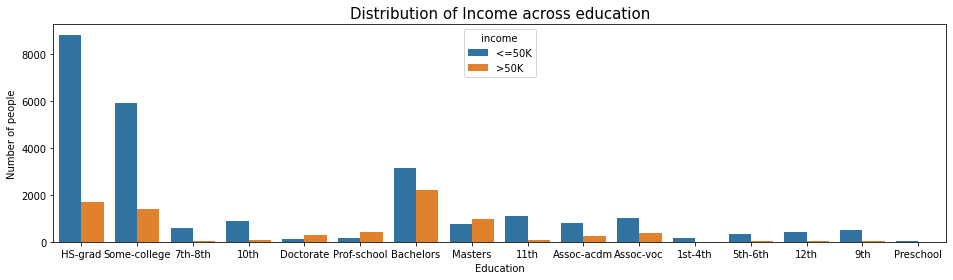

In [33]:
#Income by education
plt.figure(figsize=[16,4])
sns.countplot(census['education'], hue=census['income'])
plt.title('Distribution of Income across education', fontsize=15)
plt.xlabel('Education')
plt.ylabel('Number of people')
plt.show()

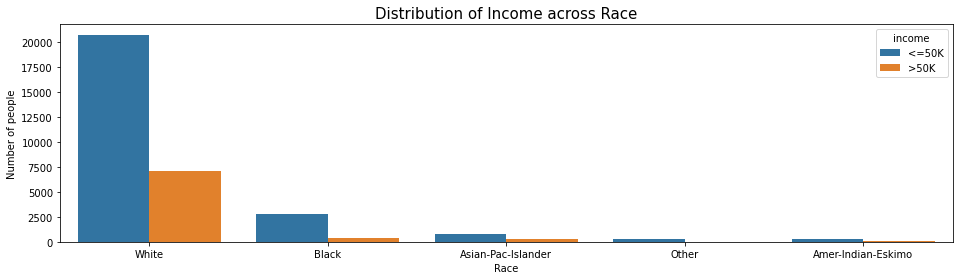

In [34]:
#Income by Race
plt.figure(figsize=[16,4])
sns.countplot(census['race'], hue=census['income'])
plt.title('Distribution of Income across Race', fontsize=15)
plt.xlabel('Race')
plt.ylabel('Number of people')
plt.show()

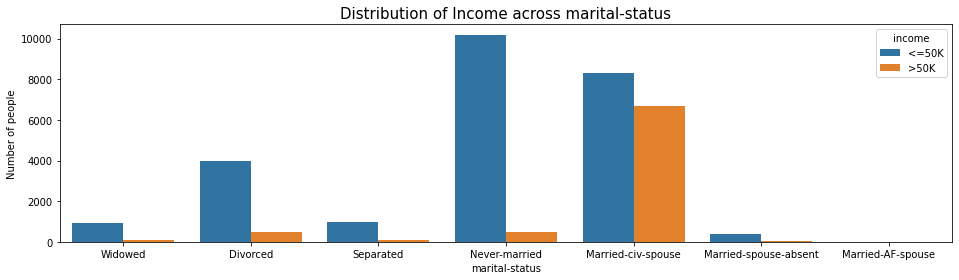

In [35]:
#Income by Marital Status
plt.figure(figsize=[16,4])
sns.countplot(census['marital.status'], hue=census['income'])
plt.title('Distribution of Income across marital-status', fontsize=15)
plt.xlabel('marital-status')
plt.ylabel('Number of people')
plt.show()

In [36]:
#In this dataset, the most number of people are young, white, male, 
#high school graduates with 9 to 10 years of education and work 40 hours per week.

## Multivariate Analysis

In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [38]:
census['income'] = le.fit_transform(census['income'])

In [39]:
census_num= census[['age','education.num','hours.per.week','capital.gain','capital.loss', 'income']]

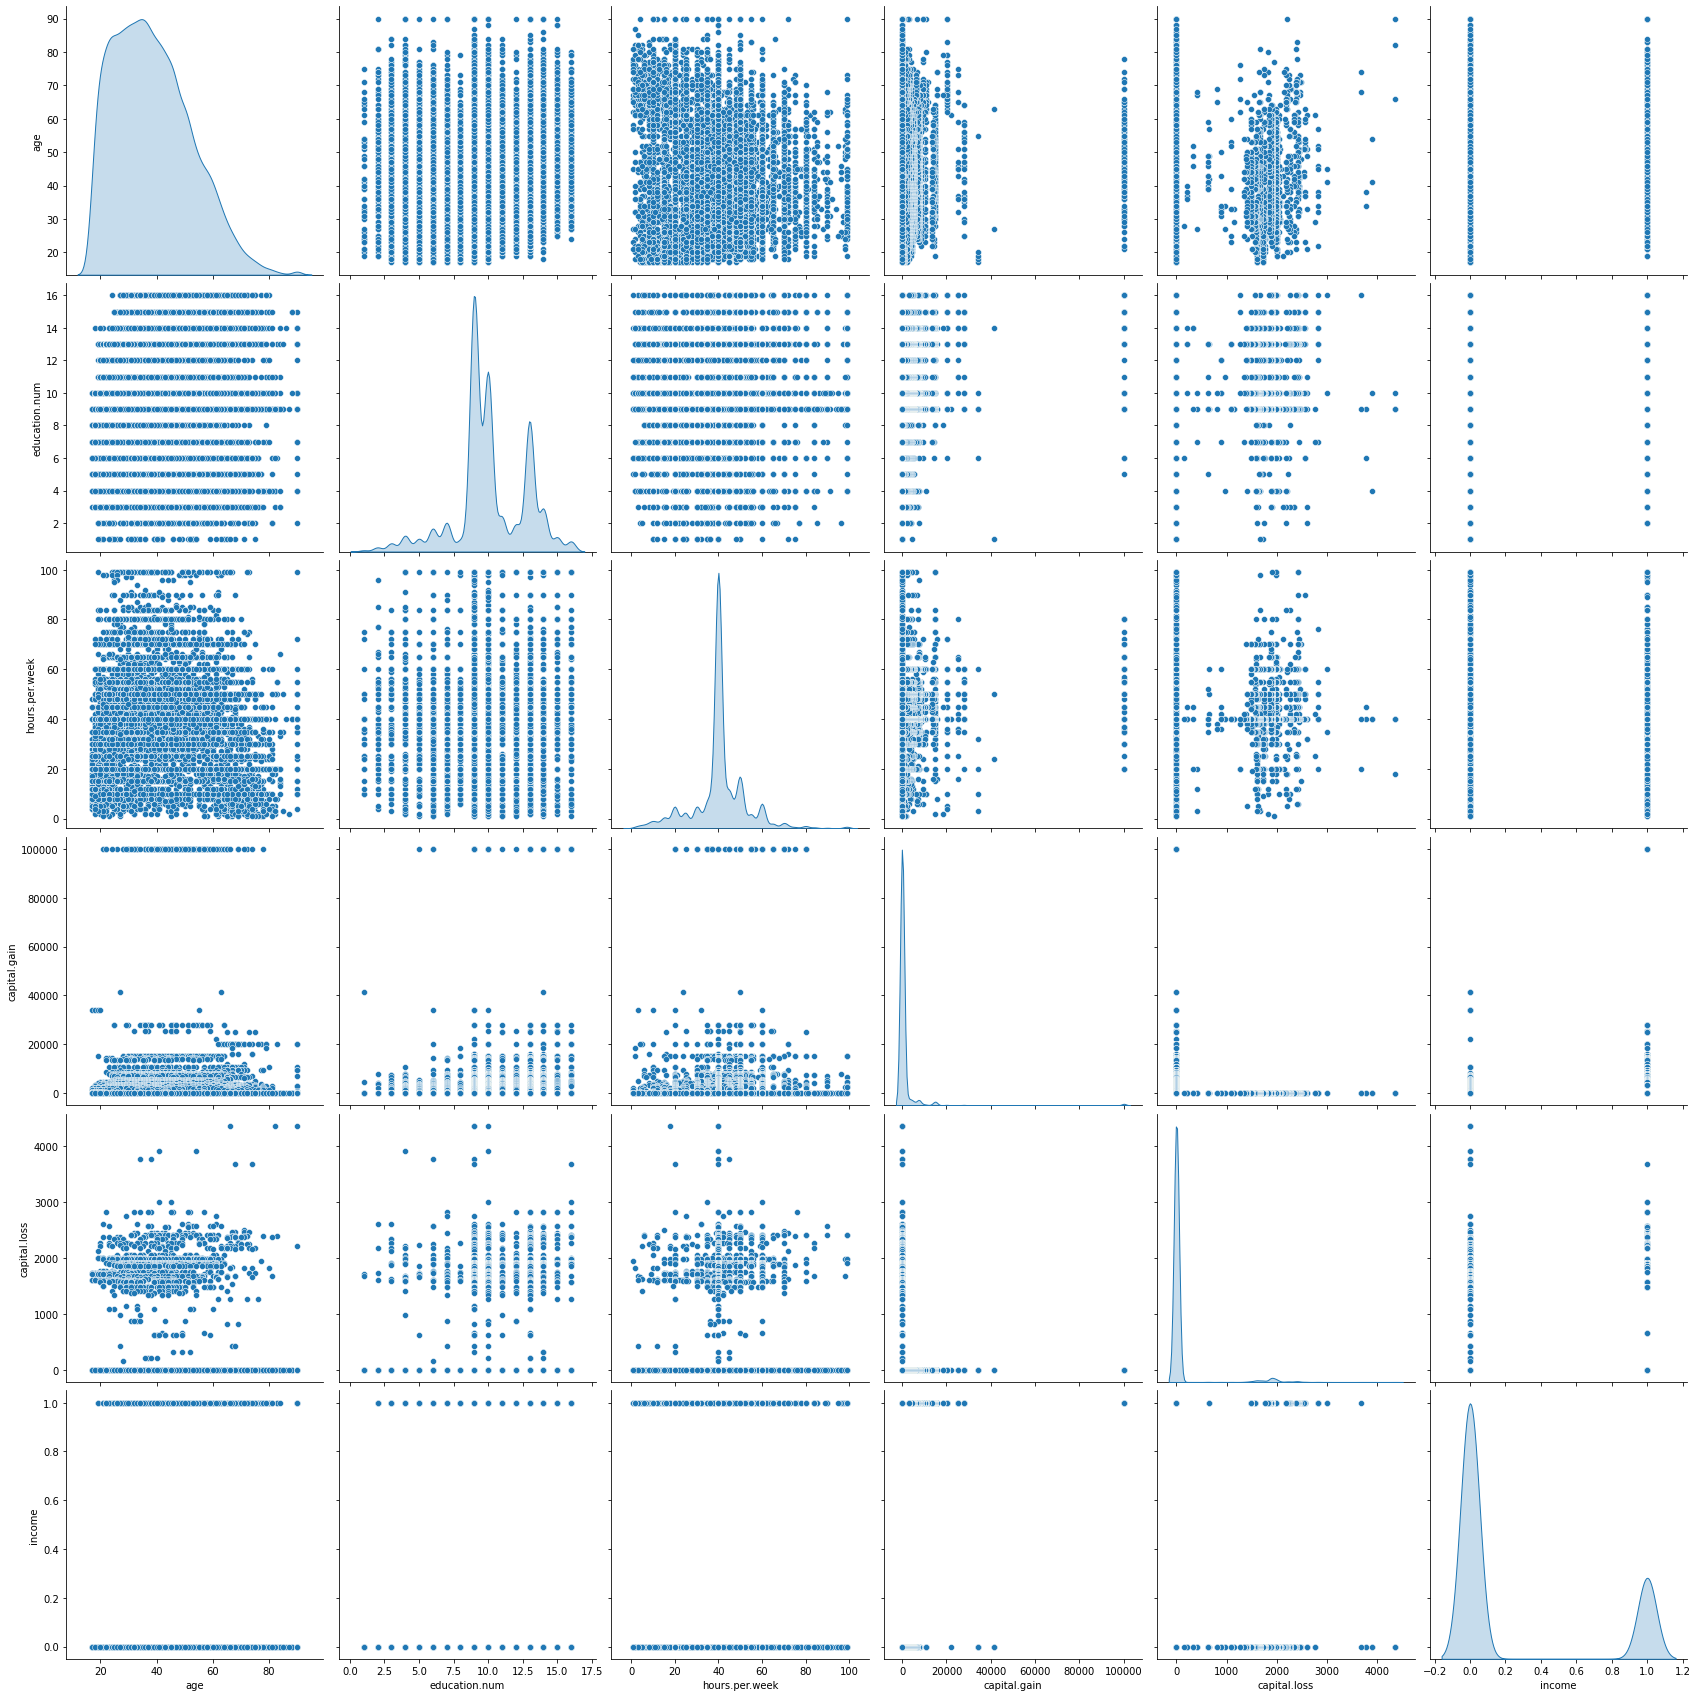

In [40]:
sns.pairplot(census_num, 
             #hue="income", 
             diag_kind="kde",
             size=4);

In [41]:
# Finding correlation matrix
corr= census.corr()

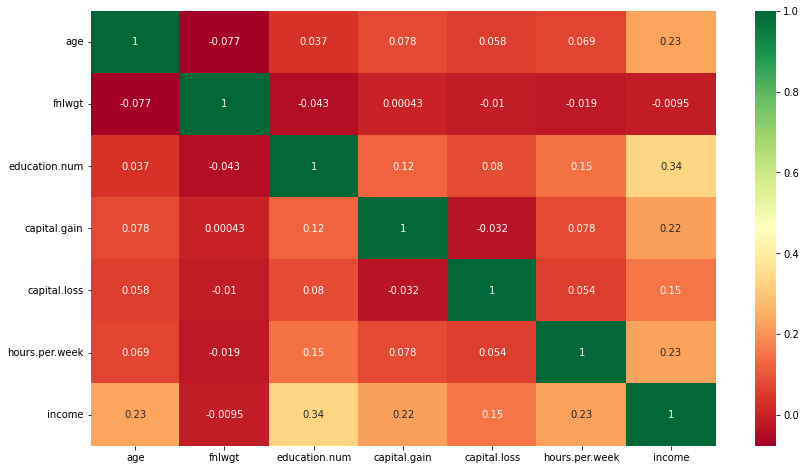

In [42]:
plt.figure(figsize=[14,8])
sns.heatmap(corr, annot=True,cmap='RdYlGn')
plt.show()

## Preprocessing

### Label Encoding

In [43]:
census.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,0
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,1
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,0
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,United-States,1


In [44]:
for col in census.columns:
    if census[col].dtypes == 'object':
        encoder = LabelEncoder()
        census[col] = encoder.fit_transform(census[col])

In [45]:
census.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,3,77053,11,9,6,9,1,4,0,0,4356,40,38,0
1,82,3,132870,11,9,6,3,1,4,0,0,4356,18,38,0
2,66,3,186061,15,10,6,9,4,2,0,0,4356,40,38,0
3,54,3,140359,5,4,0,6,4,4,0,0,3900,40,38,0
4,41,3,264663,15,10,5,9,3,4,0,0,3900,40,38,0


### Feature Selection

In [46]:
X = census.drop('income', axis=1)
Y = census['income']

In [47]:
from sklearn.ensemble import ExtraTreesClassifier
selector = ExtraTreesClassifier(random_state=42)

In [48]:
selector.fit(X, Y)

ExtraTreesClassifier(random_state=42)

In [49]:
feature_imp = selector.feature_importances_

In [50]:
for index, val in enumerate(feature_imp):
    print(index, round((val * 100), 2))

0 15.59
1 4.13
2 16.71
3 3.87
4 8.66
5 8.04
6 7.27
7 8.62
8 1.47
9 2.84
10 8.83
11 2.81
12 9.64
13 1.53


In [51]:
X = X.drop(['fnlwgt', 'education.num','native.country'
             ], axis=1)

### Scaling

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
for col in X.columns:
    scaler = StandardScaler()
    X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

In [54]:
X.head()

,age,workclass,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week
0,3.769612,-0.085296,0.181332,2.249480,0.720237,-0.277805,0.393668,-1.422331,-0.14592,10.593507,-0.035429
1,3.183112,-0.085296,0.181332,2.249480,-0.790092,-0.277805,0.393668,-1.422331,-0.14592,10.593507,-1.817204
2,2.010110,-0.085296,1.214869,2.249480,0.720237,1.589322,-1.962621,-1.422331,-0.14592,10.593507,-0.035429
3,1.130359,-0.085296,-1.368974,-1.734058,-0.034928,1.589322,0.393668,-1.422331,-0.14592,9.461864,-0.035429
4,0.177296,-0.085296,1.214869,1.585557,0.720237,0.966947,0.393668,-1.422331,-0.14592,9.461864,-0.035429


### Oversampling

In [55]:
round(Y.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    75.92 %
1    24.08 %
Name: income, dtype: object

In [56]:
#The dataset is unbalanced, as the dependent feature 'income' contains 75.92% values have income less than 50k 
#and 24.08% values have income more than 50k.

In [57]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)

In [58]:
ros.fit(X, Y)

RandomOverSampler(random_state=42)

In [59]:
X_resampled, Y_resampled = ros.fit_resample(X, Y)

## Modelling and Evaluation

### Train-Test Split

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
X_train, X_test, Y_train, Y_test = train_test_split(
    X_resampled, Y_resampled, test_size=0.2, random_state=42)

In [61]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (39552, 11)
X_test shape: (9888, 11)
Y_train shape: (39552,)
Y_test shape: (9888,)


### Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)

In [63]:
log_reg.fit(X_train, Y_train)

LogisticRegression(random_state=42)

In [64]:
Y_pred_log_reg = log_reg.predict(X_test)

In [65]:
print('Logistic Regression:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_log_reg) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_log_reg) * 100, 2))

Logistic Regression:
Accuracy score: 73.37
F1 score: 73.57


### KNN Classifier

In [66]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [67]:
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [68]:
Y_pred_knn = knn.predict(X_test)

In [69]:
print('KNN Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_knn) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_knn) * 100, 2))

KNN Classifier:
Accuracy score: 83.37
F1 score: 84.4


### Naive Bayes Classifier

In [70]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [71]:
nb.fit(X_train, Y_train)

GaussianNB()

In [72]:
Y_pred_nb = nb.predict(X_test)

In [73]:
print('Naive Bayes Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_nb) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_nb) * 100, 2))

Naive Bayes Classifier:
Accuracy score: 64.3
F1 score: 49.37


### XGB Classifier

In [74]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [75]:
xgb.fit(X_train, Y_train)

XGBClassifier()

In [76]:
Y_pred_xgb = xgb.predict(X_test)

In [77]:
print('XGB Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_xgb) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_xgb) * 100, 2))

XGB Classifier:
Accuracy score: 83.36
F1 score: 83.9


### Decision Tree Classifier

In [78]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(random_state=42)

In [79]:
dec_tree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [80]:
Y_pred_dec_tree = dec_tree.predict(X_test)

In [81]:
print('Decision Tree Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_dec_tree) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_dec_tree) * 100, 2))

Decision Tree Classifier:
Accuracy score: 90.13
F1 score: 90.59


### Random Forest Classifier

In [82]:
from sklearn.ensemble import RandomForestClassifier
ran_for = RandomForestClassifier(random_state=42)

In [83]:
ran_for.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [84]:
Y_pred_ran_for = ran_for.predict(X_test)

In [85]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_ran_for) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_ran_for) * 100, 2))

Random Forest Classifier:
Accuracy score: 91.71
F1 score: 92.03


In [86]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_ran_for)

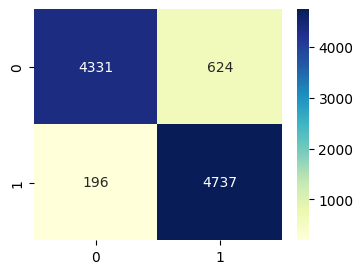

In [87]:
plt.style.use('default')
plt.figure(figsize=[4,3])
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.savefig('heatmap.png')
plt.show()

In [88]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_ran_for))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91      4955
           1       0.88      0.96      0.92      4933

    accuracy                           0.92      9888
   macro avg       0.92      0.92      0.92      9888
weighted avg       0.92      0.92      0.92      9888



### Conclusion

In this project, we build various models like logistic regression, knn classifier,xgboost classifier, decision tree classifier, and random forest classifier.

A  Random Forest Classifier gives the highest accuracy score of 91.71
 and f1 score of 92.03.

### Future Scope
To further improve the accuracy score and f1 score, we can go for hyperparameter tuning, and as we have a large dataset, we can also use neural network to build a model which can result in better performance.